In [66]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [67]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51ad1395d1c64c35aa7577fea0c4266c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8pHm9Jz1HvNzdiHUEg1JsVDAif58zLGf7sofVHF1wQvY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_51ad1395d1c64c35aa7577fea0c4266c.get_object(Bucket='ibmregression-donotdelete-pr-7ewr5zgwjfd3te',Key='winequality-red.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
df_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [69]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [91]:
df_data['quality']=np.where(df_data['quality']>=7,1,0)

In [92]:
df_data['quality'].value_counts(normalize=True)

0    0.86429
1    0.13571
Name: quality, dtype: float64

In [93]:
df_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [94]:
features_cols=[x for x in df_data.columns if x not in 'quality']

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split=StratifiedShuffleSplit(n_splits=1, test_size=0.3,random_state=42)
#Get the index value from the generator
train_idx, test_idx=next(strat_shuff_split.split(df_data[features_cols],df_data['quality']))
#create data sets
X_train=df_data.loc[train_idx,features_cols]
Y_train=df_data.loc[train_idx,'quality']

X_test=df_data.loc[test_idx,features_cols]
Y_test=df_data.loc[test_idx,'quality']

In [96]:
Y_train.value_counts(normalize=True).sort_index()

0    0.864164
1    0.135836
Name: quality, dtype: float64

In [97]:
Y_test.value_counts(normalize=True).sort_index()

0    0.864583
1    0.135417
Name: quality, dtype: float64

In [98]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=42)
DT=DT.fit(X_train,Y_train)

In [99]:
DT.tree_.node_count, DT.tree_.max_depth

(219, 12)

In [100]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

def measure_error(y_true,y_pred,label):
    return pd.Series({'accuracy':accuracy_score(y_true,y_pred),
                     'Precision': precision_score(y_true,y_pred),
                     'Recall':recall_score(y_true,y_pred),
                     'F1':f1_score(y_true,y_pred)},
                      name=label)

In [101]:
Y_train_pred=DT.predict(X_train)
Y_test_pred=DT.predict(X_test)

train_test_full_error=pd.concat([measure_error(Y_train,Y_train_pred,'Train'),
                                measure_error(Y_test,Y_test_pred,'Test')],
                                axis=1)
train_test_full_error

,Train,Test
accuracy,1.0,0.887500
Precision,1.0,0.600000
Recall,1.0,0.507692
F1,1.0,0.550000


In [102]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':range(1,DT.tree_.max_depth+1,2),
            'max_features':range(1,len(DT.feature_importances_)+1)}
GR=GridSearchCV(DecisionTreeClassifier(random_state=42),
               param_grid=param_grid,
               n_jobs=-1)
GR=GR.fit(X_train,Y_train)

In [103]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(47, 5)

In [104]:
Y_train_pred_gr=GR.predict(X_train)
Y_test_pred_gr=GR.predict(X_test)

test_train_error_gr=pd.concat([measure_error(Y_train,Y_train_pred_gr,'Train'),
                                measure_error(Y_test,Y_test_pred_gr,'Test')],
                                axis=1)
test_train_error_gr

,Train,Test
accuracy,0.913315,0.893750
Precision,0.700730,0.659091
Recall,0.631579,0.446154
F1,0.664360,0.532110


In [61]:
from io import StringIO
from IPython.display import Image
!pip install pydotplus
from sklearn.tree import export_graphviz


In [62]:
import pydotplus

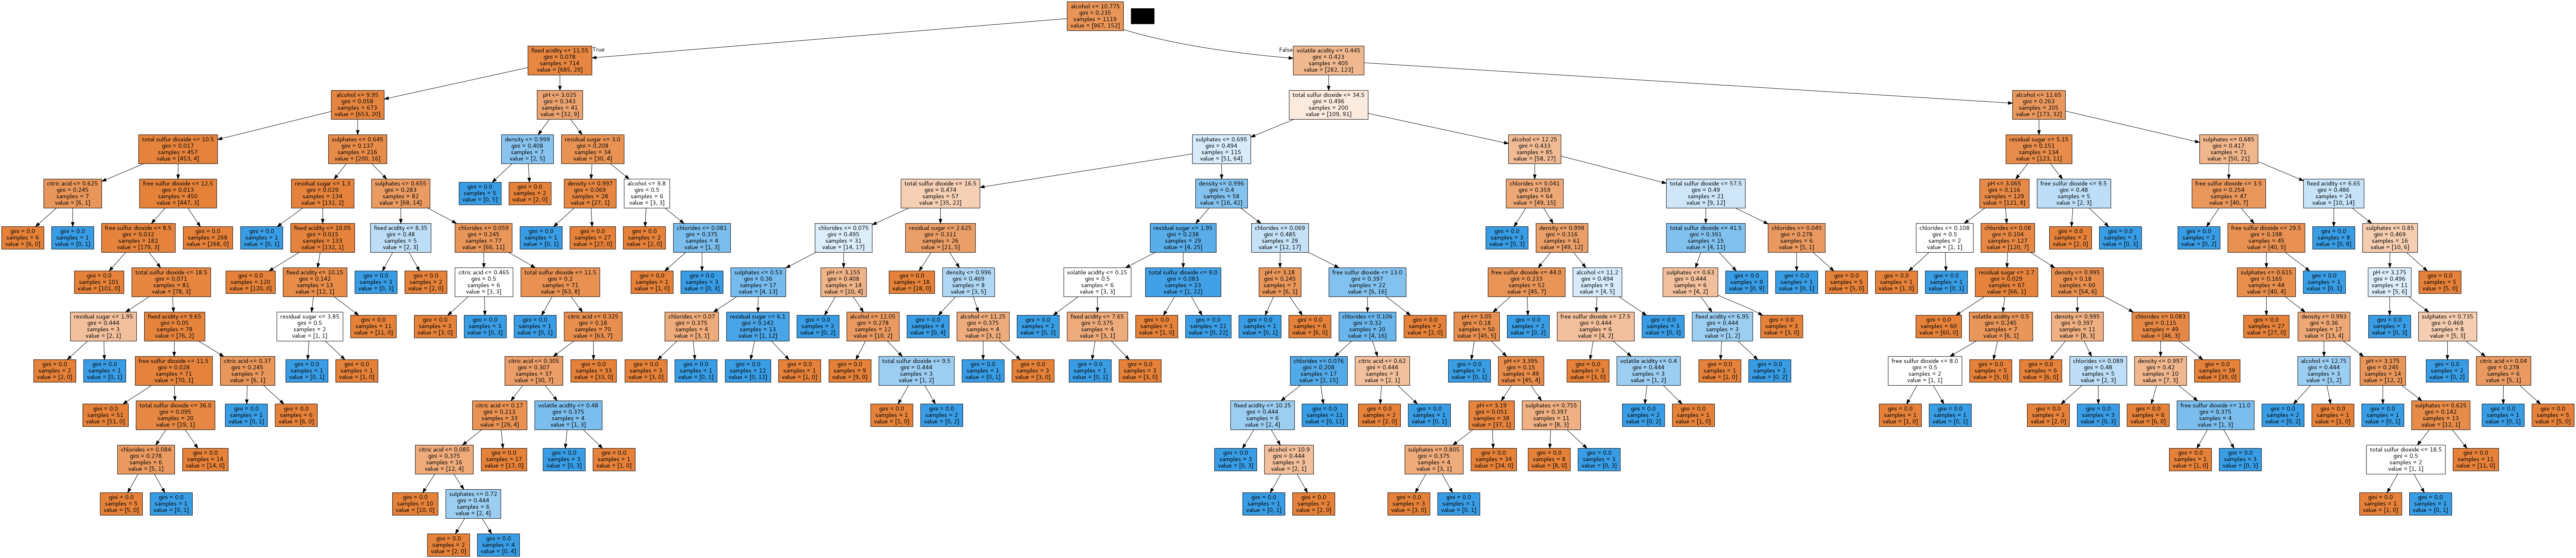

In [63]:
dot_data=StringIO()

export_graphviz(DT,out_file=dot_data,filled=True,feature_names=features_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

#view the tree image
filename='Wine_tree_trial.png'
graph.write_png(filename)
Image(filename=filename)

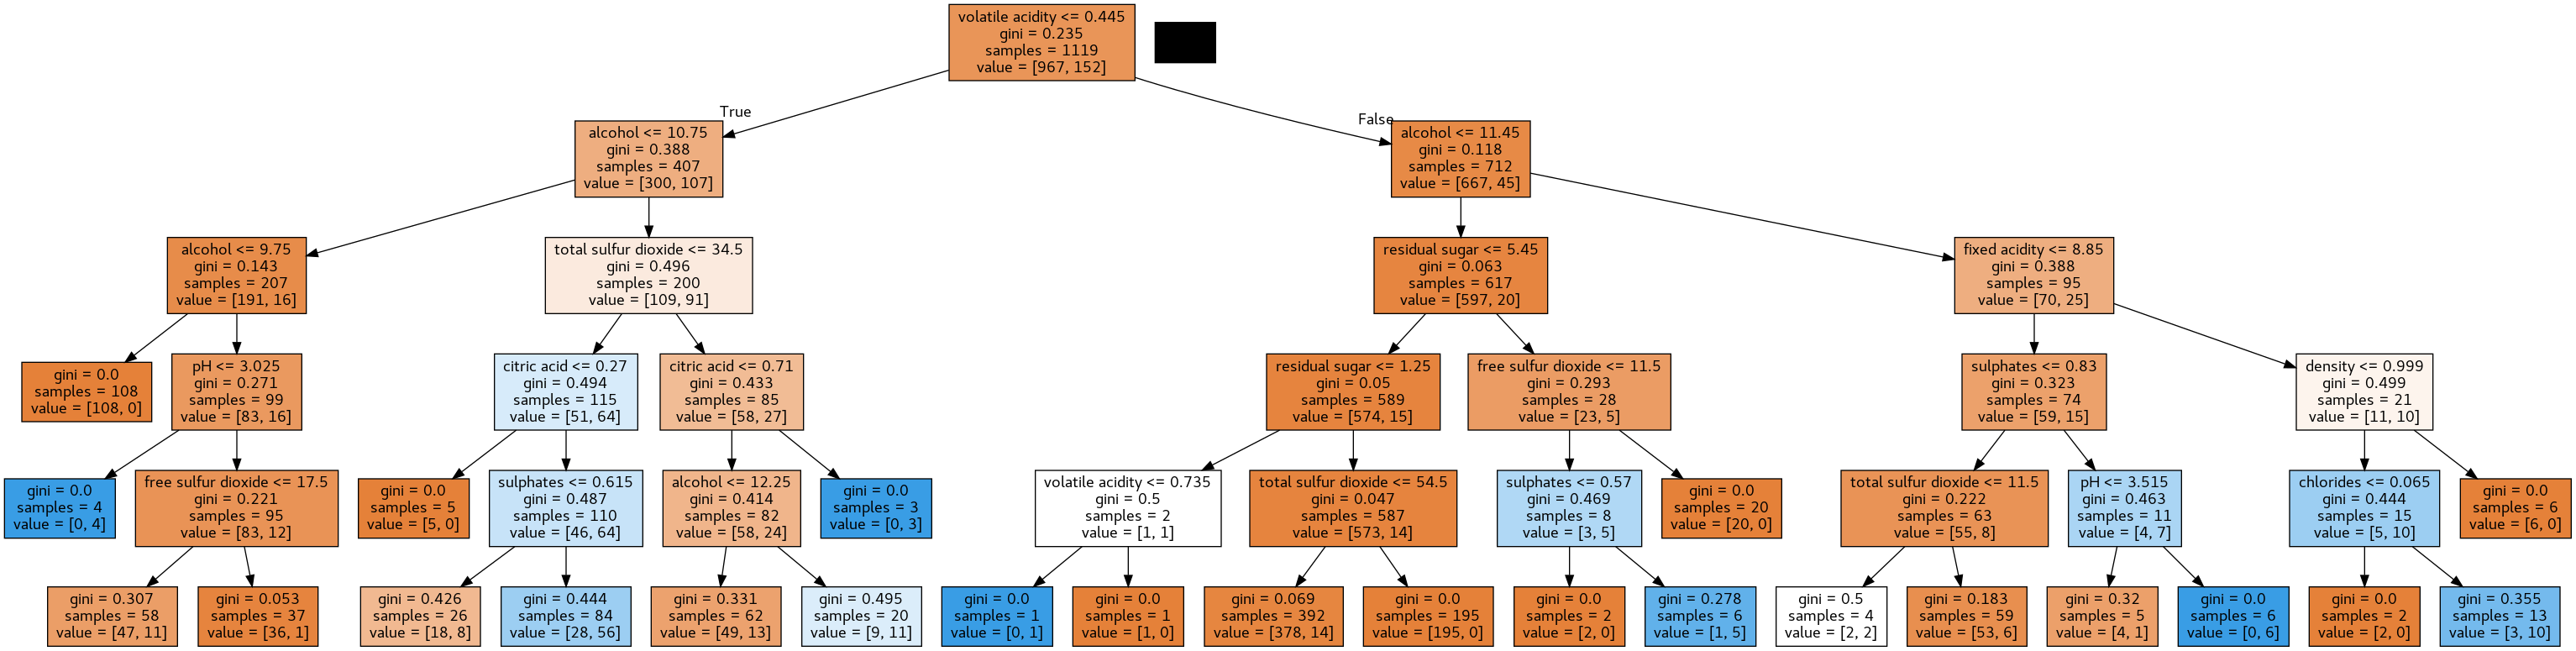

In [65]:
dot_data=StringIO()

export_graphviz(GR.best_estimator_,out_file=dot_data,filled=True,feature_names=features_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

#view the tree image
filename='Wine_tree.png'
graph.write_png(filename)
Image(filename=filename)